In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:07<00:00, 134MB/s]
100% 1.06G/1.06G [00:07<00:00, 148MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Imports

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import Sequential

## Making Train and Test directories

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)

)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# These all images are stored in numpy array and each values of numpy array is between 0 to 255.
# We have to normalized it to 0 to 1.

## Normalization

In [10]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
from keras.layers import Dropout
from keras.layers import BatchNormalization

## Model Building (Simple CNN Architecture)

In [18]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

In [21]:
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.5115 - loss: 4.7552 - val_accuracy: 0.5014 - val_loss: 0.6916
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.4978 - loss: 0.6979 - val_accuracy: 0.4904 - val_loss: 0.7335
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 77ms/step - accuracy: 0.5002 - loss: 0.6999 - val_accuracy: 0.5074 - val_loss: 0.7071
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.5031 - loss: 0.7443 - val_accuracy: 0.4986 - val_loss: 0.6934
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.4953 - loss: 0.7424 - val_accuracy: 0.5010 - val_loss: 0.7017
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.4972 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.4995 - loss: 0.6932 - 

In [24]:
import matplotlib.pyplot as plt

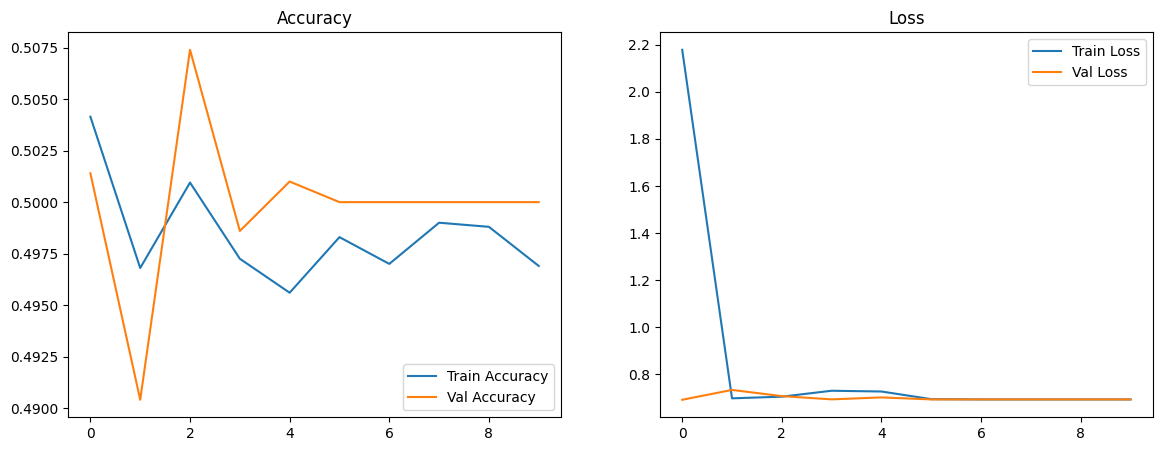

In [25]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()


In [69]:
## This model is overfit model.
## This model's accuracy is around 50%  which shows this model has learned nothing and it's just gussing the result.


## Trying New Model

In [26]:
# Prefetch for performance


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)

## Model Building (MobileNetV2)

In [28]:
from keras.applications import MobileNetV2

In [30]:
# Load pretrained MobileNetV2 (without top)


base_model = MobileNetV2(input_shape=(256, 256, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base model

/tmp/ipython-input-30-2409011856.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(256, 256, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
from keras import layers

In [33]:
model_1 = Sequential()
model_1.add(base_model)
model_1.add(layers.GlobalAveragePooling2D())
model_1.add(layers.Dropout(0.3))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dropout(0.2))
model_1.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

In [37]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
history_1 = model_1.fit(train_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9938 - loss: 0.0159 - val_accuracy: 0.9854 - val_loss: 0.0432
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9934 - loss: 0.0162 - val_accuracy: 0.9856 - val_loss: 0.0467
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9942 - loss: 0.0147 - val_accuracy: 0.9864 - val_loss: 0.0449
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9958 - loss: 0.0141 - val_accuracy: 0.9848 - val_loss: 0.0470
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9862 - val_loss: 0.0450
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 0.9854 - val_loss: 0.0442
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9959 - loss: 0.0109 - val_accuracy: 0.9836 - val_loss: 0.0562
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9964 - loss: 0.0102 - 

## Unfreezing and fine tuning the model

In [41]:
base_model.trainable = True

model_1.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Very small LR
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model_1.fit(train_ds,
                              epochs=5,
                              validation_data=validation_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 146ms/step - accuracy: 0.9200 - loss: 0.3862 - val_accuracy: 0.9832 - val_loss: 0.0742
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 139ms/step - accuracy: 0.9771 - loss: 0.0680 - val_accuracy: 0.9846 - val_loss: 0.0597
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 139ms/step - accuracy: 0.9827 - loss: 0.0497 - val_accuracy: 0.9854 - val_loss: 0.0474
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 139ms/step - accuracy: 0.9873 - loss: 0.0343 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 140ms/step - accuracy: 0.9903 - loss: 0.0280 - val_accuracy: 0.9874 - val_loss: 0.0406


## Visulization

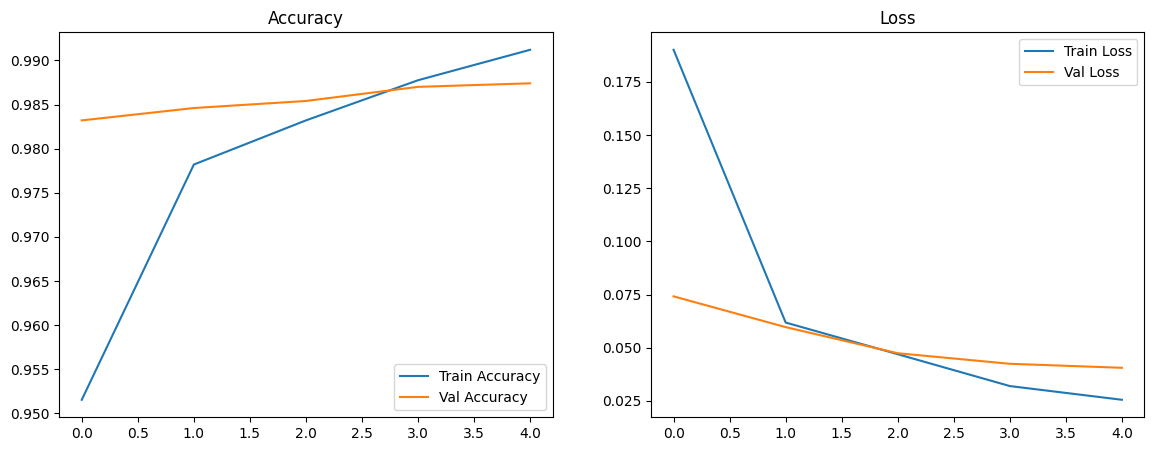

In [48]:


acc = fine_tune_history.history['accuracy']
val_acc = fine_tune_history.history['val_accuracy']
loss = fine_tune_history.history['loss']
val_loss = fine_tune_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')

plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')

plt.title('Loss')
plt.show()


## Predict whether Cat Or Dog

In [49]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np


In [54]:


def predict_image(image_path, model, class_names=['Cat', 'Dog']):
    img = load_img(image_path, target_size=(256, 256))  # Resize image
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    predictions = model_1.predict(img_array)
    predicted_label = class_names[int(predictions[0] > 0.5)]

    print(f"Predicted Label: {predicted_label}")
    return predicted_label

In [56]:
import cv2

## Testing 1

In [57]:
test_img = cv2.imread('/content/cat.webp')

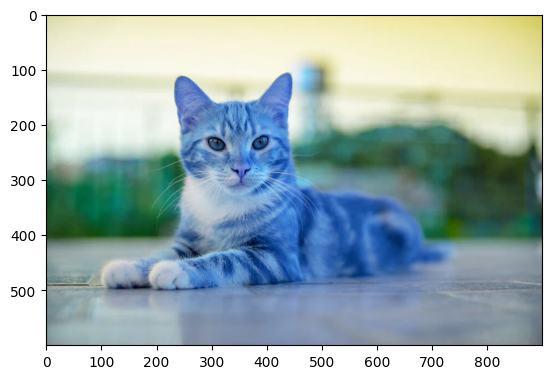

In [58]:
plt.imshow(test_img)

In [55]:
predict_image('/content/cat.webp', model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Label: Cat


/tmp/ipython-input-54-3501422466.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_names[int(predictions[0] > 0.5)]


'Cat'

## Testing 2

In [62]:
test_img_2 = cv2.imread('/content/dog.jpeg')

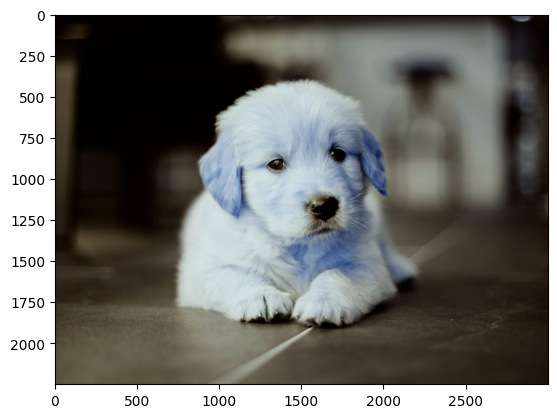

In [63]:
plt.imshow(test_img_2)

In [60]:
predict_image('/content/dog.jpeg', model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label: Dog


/tmp/ipython-input-54-3501422466.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_names[int(predictions[0] > 0.5)]


'Dog'

## Save and Load the Model

In [65]:
model_1.save('cat_dog_mobilenetv2.h5')    #HDF5 format

In [67]:
from tensorflow.keras.models import load_model

In [68]:
loaded_model = load_model('cat_dog_mobilenetv2.h5')